In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [42]:
df = pd.read_csv('final_df.csv')
df = df[:750]

In [4]:
max(df.pol_co2), min(df.pol_co2)

(421, 390)

In [5]:
max(df.aqi), min(df.aqi)

(421, 390)

In [6]:
import matplotlib.pyplot as plt

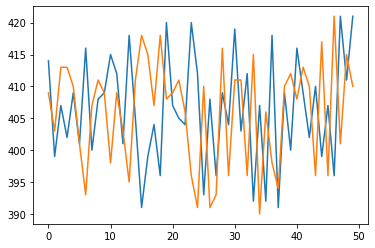

In [12]:
plt.plot(df.pol_co2[:50])
plt.plot(df.aqi[:50])

In [13]:
df.corr()['pol_co2']

weather_temp           0.000660
weather_humidity      -0.001484
barometric_pressure    0.004917
pol_co                 0.001109
pol_so2               -0.002405
pol_no2               -0.004175
pol_pm10              -0.002147
pol_pm25              -0.001254
pol_co2                1.000000
aqi                   -0.003559
lat                   -0.002974
long                   0.003727
fac_indfood           -0.001762
fac_indpharm          -0.001753
fac_indtech           -0.001753
fac_indman            -0.001758
fac_indfert           -0.001762
active_population      0.006139
fac_avg_speed         -0.002422
Name: pol_co2, dtype: float64

In [14]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq1 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [15]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [16]:
model = models.Sequential([
    layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    layers.LSTM(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(10)),
])

In [17]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [18]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01), metrics=[last_time_step_mse])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 20)          1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.save('model.h5')

In [97]:
indpro = np.exp(np.linspace(0, 1, df.shape[0] * 100))

In [98]:
indpro += np.random.uniform(0, 1, size=df.shape[0]* 100)

In [77]:
traf = generate_time_series(df.shape[0], 100) + 23

In [78]:
traf.shape

(750, 100, 1)

In [79]:
traf = traf.reshape(-1, 1)

In [100]:
indpro = indpro.reshape(-1, 1)

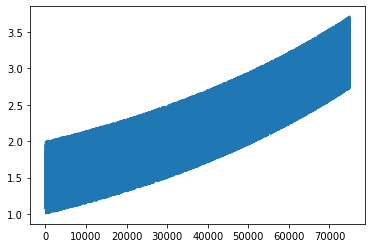

In [99]:
plt.plot(indpro)

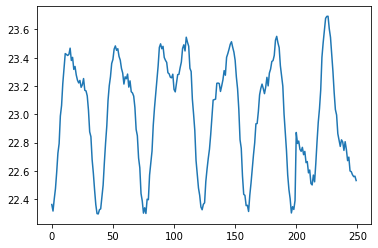

In [80]:
plt.plot(traf[:250])

In [73]:
aqi = abs(arr_df + arr_df * arr) + abs(np.random.normal()) * arr + 34

In [74]:
aqi.shape

(75000, 1)

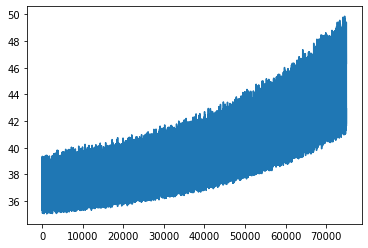

In [75]:
plt.plot(aqi)

In [101]:
df_new = pd.DataFrame({
    'indpro': indpro.reshape(-1, ),
    'traf': traf.reshape(-1, ),
    'aqi': aqi.reshape(-1, ),
}, index=range(75000))

In [102]:
df_new.to_csv('new_data.csv', index=False)

In [103]:
df_new

,indpro,traf,aqi
0,1.560089,22.362915,36.646045
1,1.827607,22.316763,37.895171
2,1.271843,22.401760,38.413979
3,1.066337,22.474621,38.008994
4,1.124407,22.590065,38.002114
...,...,...,...
74995,3.039410,22.914547,46.034100
74996,3.664419,22.872156,43.489914
74997,3.505134,22.936234,44.708172
74998,3.230933,22.842356,43.662569


In [111]:
df_new.corr()

,indpro,traf,aqi
indpro,1.000000,0.004325,0.747118
traf,0.004325,1.000000,0.006208
aqi,0.747118,0.006208,1.000000
